In [1]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Model

In [2]:
from keras.models import Sequential
#this gives our network as a sequential network

from keras.layers import Conv2D
#we are working on images so it is in 2D 

from keras.layers import MaxPooling2D

from keras.layers import Flatten
#it is process of coverting all resultant 2d arrays as single long continuous linear vector  

from keras.layers import Dense, Dropout
#full connection of nn is done by dense

In [3]:
img=ImageDataGenerator(rescale=1./255,zoom_range=0.05, fill_mode='constant',cval=0.,
                       horizontal_flip=True,vertical_flip=True,validation_split=0.2)
classes = os.listdir('../input/emotion-detection-3-channel/emotions dataset_3')
num_class=len(classes)
num_class

7

In [15]:
SEED = 548
BATCH_SIZE = 256
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224
train_ds = img.flow_from_directory('../input/emotion-detection-3-channel/emotions dataset_3',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       subset="training")

Found 22968 images belonging to 7 classes.


In [16]:
val_ds = img.flow_from_directory('../input/emotion-detection-3-channel/emotions dataset_3',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       subset="validation")

Found 5741 images belonging to 7 classes.


In [17]:
vgg19 = tf.keras.applications.VGG19(
    include_top = False, 
    weights = 'imagenet', 
    input_shape = (224,224,3),
    pooling = None, 
)

In [18]:
vgg19.trainable = False

In [19]:
x=Flatten()(vgg19.output)
x=tf.keras.layers.Dropout(0.2)(x)
# x=tf.keras.layers.Dense(128,activation="relu")(x)
# x=tf.keras.layers.Dropout(0.09)(x)
predictions = Dense(7, activation="softmax")(x)
model_vgg = Model(vgg19.input, predictions)
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [20]:
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
history_vgg= model_vgg.fit(train_ds,steps_per_epoch=22968//256,
                           epochs=10,
                            validation_data = val_ds)

Epoch 1/10
89/89 [==============================] - 375s 4s/step - loss: 1.9019 - accuracy: 0.3095 - val_loss: 1.5580 - val_accuracy: 0.3954
Epoch 2/10
89/89 [==============================] - 335s 4s/step - loss: 1.5408 - accuracy: 0.4051 - val_loss: 1.5095 - val_accuracy: 0.4149
Epoch 3/10
89/89 [==============================] - 332s 4s/step - loss: 1.4866 - accuracy: 0.4362 - val_loss: 1.4983 - val_accuracy: 0.4142
Epoch 4/10
89/89 [==============================] - 332s 4s/step - loss: 1.4546 - accuracy: 0.4445 - val_loss: 1.4525 - val_accuracy: 0.4496
Epoch 5/10
89/89 [==============================] - 335s 4s/step - loss: 1.4247 - accuracy: 0.4565 - val_loss: 1.4764 - val_accuracy: 0.4353
Epoch 6/10
89/89 [==============================] - 333s 4s/step - loss: 1.4168 - accuracy: 0.4649 - val_loss: 1.3902 - val_accuracy: 0.4722
Epoch 7/10
89/89 [==============================] - 332s 4s/step - loss: 1.3987 - accuracy: 0.4647 - val_loss: 1.4401 - val_accuracy: 0.4430
Epoch 8/10
89

In [22]:
import matplotlib.pyplot as plt

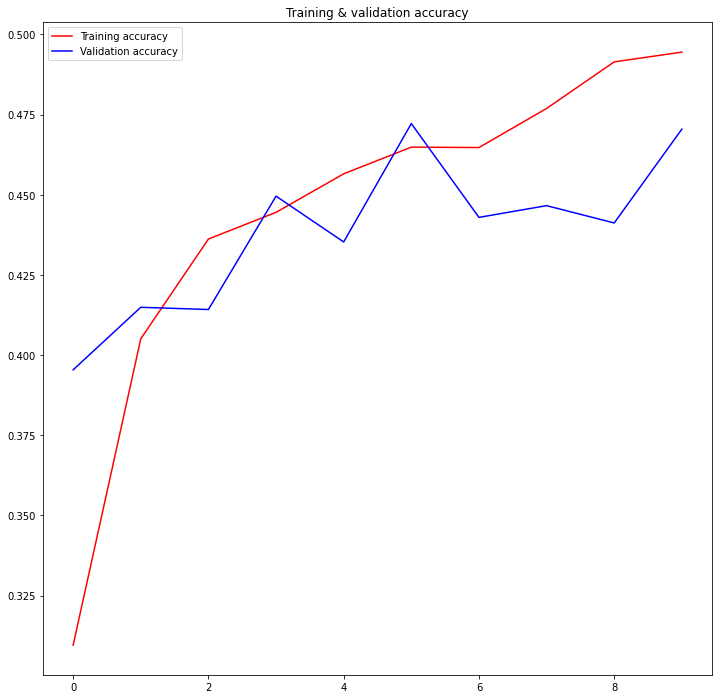

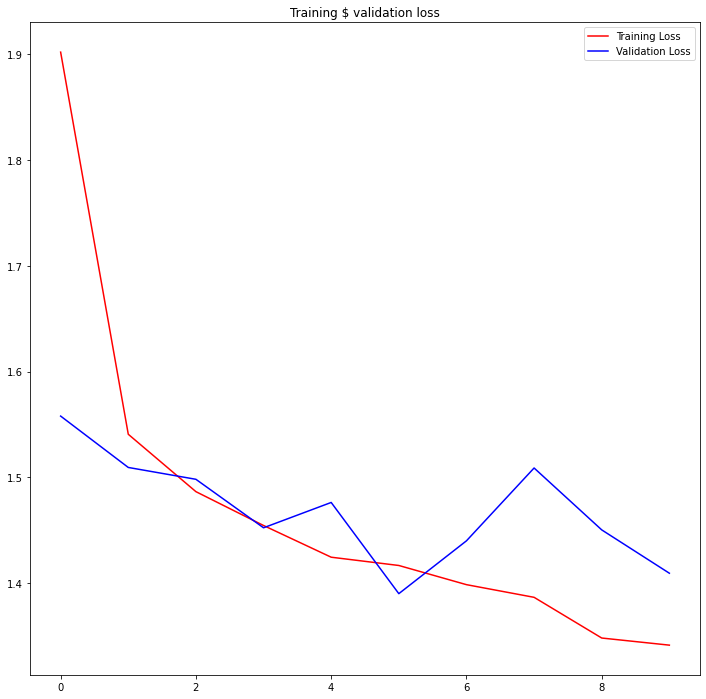

In [27]:
# print("metrics of vgg-19 model")
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()
plt.show()
